In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, accuracy_score
from matplotlib.colors import LinearSegmentedColormap


In [156]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [157]:
!kaggle datasets download -d shree1992/housedata
!unzip /content/housedata.zip

Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
housedata.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/housedata.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [159]:
data = pd.read_csv('/content/data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [160]:
data.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [161]:
# 1. Add random null values
np.random.seed(42)
for col in ['bedrooms', 'bathrooms', 'floors','street','city','date']:  # Columns with nulls
    data.loc[data.sample(frac=0.1).index, col] = np.nan


In [162]:
data.isnull().sum()

,0
date,460
price,0
bedrooms,460
bathrooms,460
sqft_living,0
sqft_lot,0
floors,460
waterfront,0
view,0
condition,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [164]:
# 2. Preprocessing
columns_mean = ['bedrooms', 'bathrooms']
columns_mode = ['street','city','date']
columns_median = ['floors']


In [165]:
# Mean
data[columns_mean] = data[columns_mean].fillna(data[columns_mean].mean())

# Median
data[columns_median] = data[columns_median].fillna(data[columns_median].median())

# Mode
for col in columns_mode:
    data[col] = data[col].fillna(data[col].mode()[0])
    data[col] = data[col].astype(str)


In [166]:
data.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [167]:
non_numeric_data = data.select_dtypes(exclude=[np.number])
non_numeric_cols = non_numeric_data.columns

for col in non_numeric_cols:
    if col in data.columns and col != 'price':
        if data[col].dtype == 'object':
            encoder = LabelEncoder()
            data[col] = encoder.fit_transform(data[col])

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   int64  
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   int64  
 15  city           4600 non-null   int64  
 16  statezip       4600 non-null   int64  
 17  country        4600 non-null   int64  
dtypes: float

Correlation with price:
price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.316798
view             0.228504
sqft_basement    0.210427
bedrooms         0.187855
floors           0.144098
waterfront       0.135648
sqft_lot         0.050451
date             0.036690
condition        0.034915
street           0.031612
yr_built         0.021857
city             0.018482
yr_renovated    -0.028774
statezip        -0.043385
country               NaN
Name: price, dtype: float64


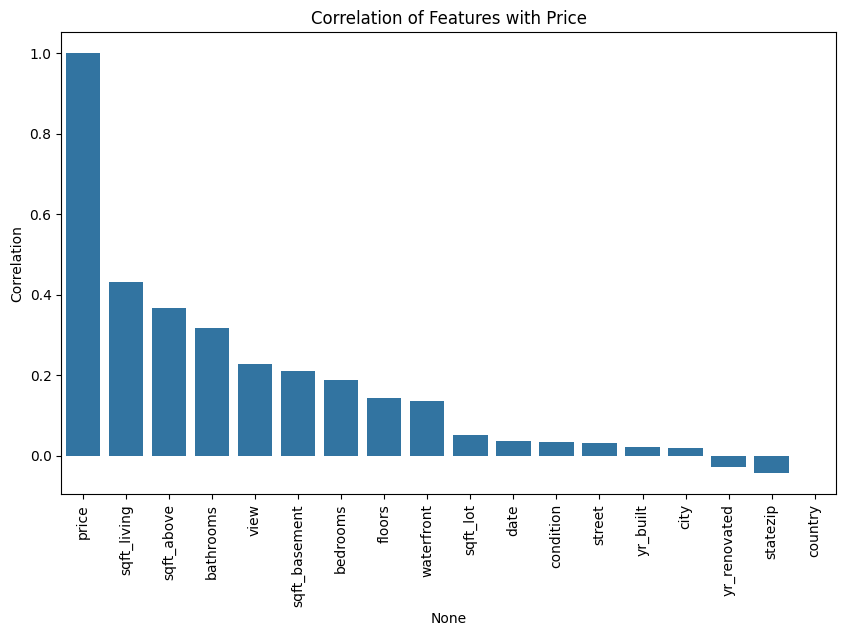

In [169]:
# 3. Choose Features
correlation = data.corr()
correlation_with_price = correlation['price'].sort_values(ascending=False)

print("Correlation with price:")
print(correlation_with_price)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price.index, y=correlation_with_price.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Price")
plt.ylabel("Correlation")
plt.show()


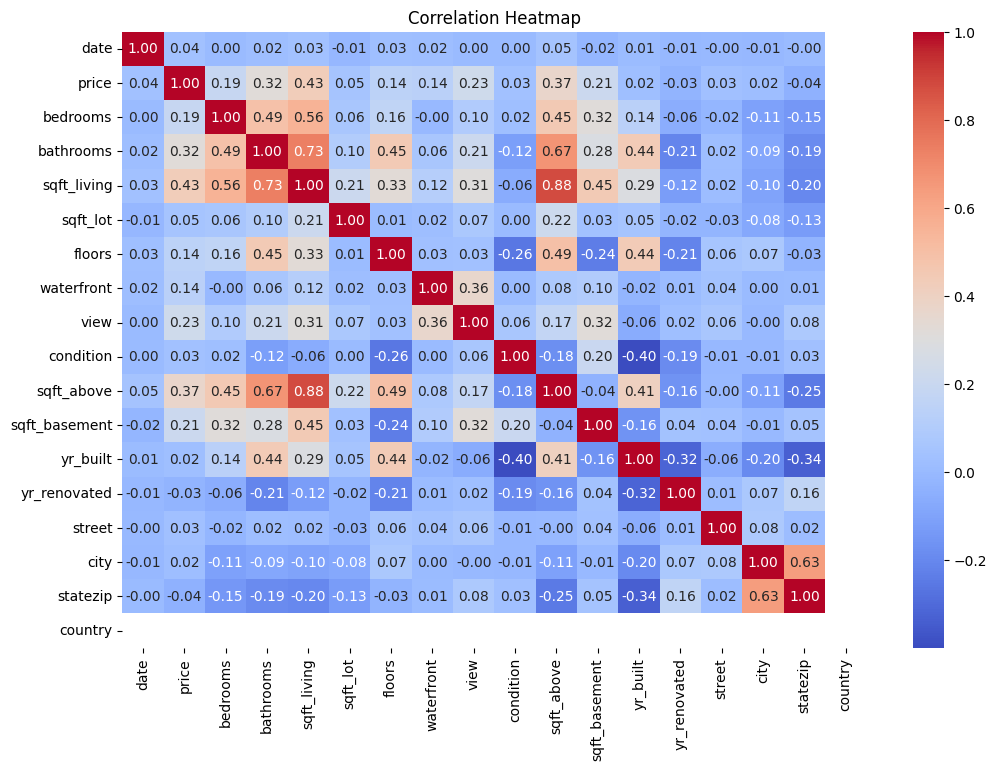

In [170]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap")
plt.show()

<ipython-input-171-ccbf29a130e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=significant_features.index, y=significant_features.values, palette="viridis")


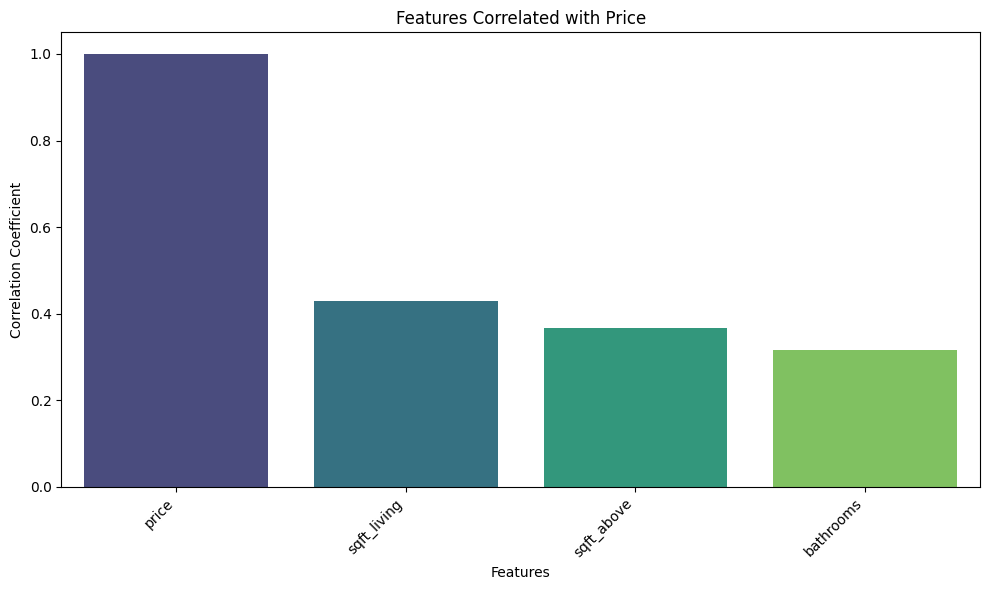

In [171]:
threshold = 0.3
significant_features = correlation_with_price[(correlation_with_price > threshold) | (correlation_with_price < -threshold)]

plt.figure(figsize=(10, 6))
sns.barplot(x=significant_features.index, y=significant_features.values, palette="viridis")

plt.title("Features Correlated with Price")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for readability
plt.tight_layout()
plt.show()

In [172]:
data['price'] = np.log1p(data['price'])  # log1p(x) = log(1 + x) [Normalization]

In [180]:
# Standardize Numerical Features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [181]:
X = data[['sqft_living','sqft_above','bathrooms']]  # Features
y = data['price']  # Target


In [182]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [183]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)



In [184]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
'''

y_test_original = np.expm1(y_test)  # Reverse log1p transformation
y_pred_lin_original = np.expm1(y_pred_lin)
y_pred_knn_original = np.expm1(y_pred_knn)

'''

In [185]:
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, mae

r2_lin, mse_lin, mae_lin = evaluate_model(y_test, y_pred_lin)
r2_knn, mse_knn, mae_knn = evaluate_model(y_test, y_pred_knn)

print(f"Linear Regression:\nR-squared: {r2_lin:.2f}, MSE: {mse_lin:.2f}, MAE: {mae_lin:.2f}\n")
print(f"KNN:\nR-squared: {r2_knn:.2f}, MSE: {mse_knn:.2f}, MAE: {mae_knn:.2f}")

Linear Regression:
R-squared: 0.05, MSE: 0.97, MAE: 0.34

KNN:
R-squared: -0.12, MSE: 1.14, MAE: 0.40


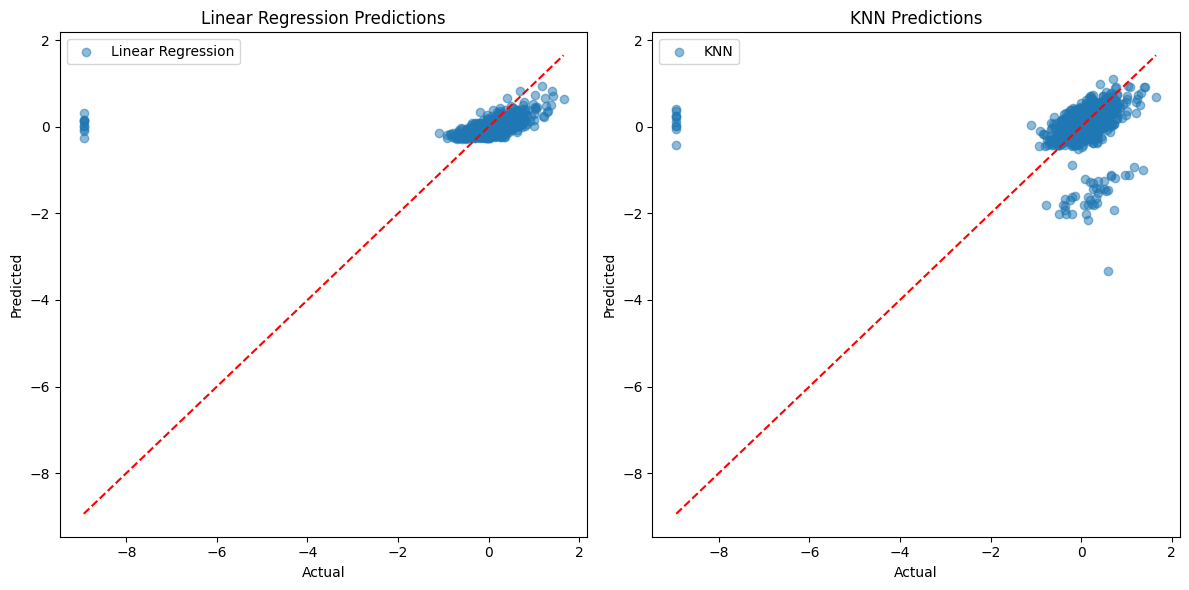

In [187]:
# 4. Visualization and Comparison

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5, label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression Predictions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.5, label='KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Predictions")
plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

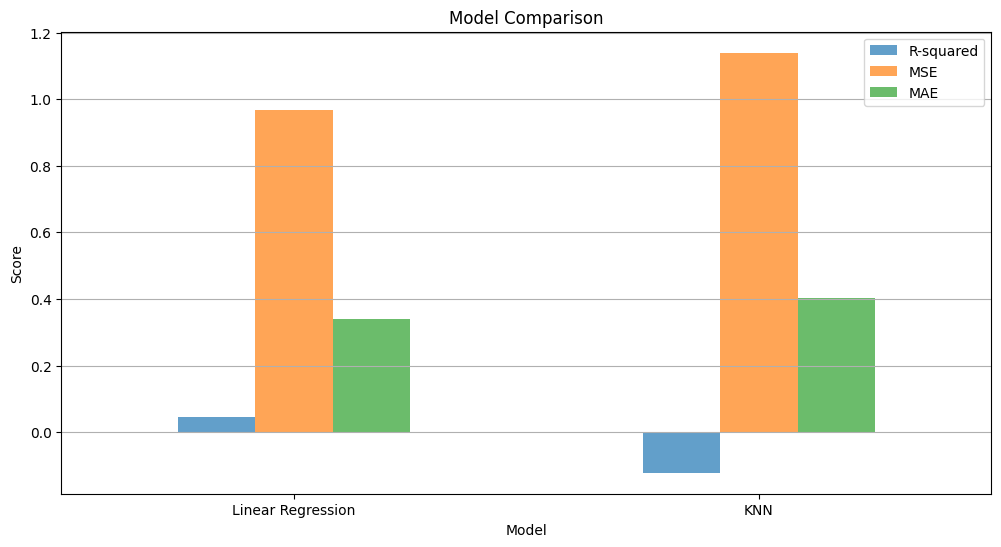

In [188]:
# Compare Evaluation Metrics
metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "KNN"],
    "R-squared": [r2_lin, r2_knn],
    "MSE": [mse_lin, mse_knn],
    "MAE": [mae_lin, mae_knn]
})

# Bar plot for comparison
plt.figure(figsize=(12, 6))
metrics_df.set_index("Model").plot(kind="bar", figsize=(12, 6), alpha=0.7)
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()